In [1]:
%matplotlib notebook
import xemc3
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import xarray as xr
import numpy as np
import ipywidgets as widgets
import mpl_interactions.ipyplot as iplt

In [2]:
experiment = "N03.00_P05.00_D05_C04.50-TEST"
ds = xr.open_dataset(f"../atomdatpy/NetCDFs/{experiment}.nc")

In [3]:
def crossec_pcolorgrid(ds, phi):
    # (A+1)*(B+1) = AB + A + B +1
    outR = np.empty((len(ds["r"])+1, len(ds["theta"])+1))
    outZ = outR.copy()
    
    outR[:-1,:-1] = ds["R_bounds"][ :, :,phi,0,0,0]  # AB
    outR[:-1, -1] = ds["R_bounds"][ :,-1,phi,0,1,0]  # A
    outR[ -1,:-1] = ds["R_bounds"][-1, :,phi,1,0,0]  # B
    outR[ -1, -1] = ds["R_bounds"][-1,-1,phi,1,1,0]  # 1
    
    outZ[:-1,:-1] = ds["z_bounds"][ :, :,phi,0,0,0]  # AB
    outZ[:-1, -1] = ds["z_bounds"][ :,-1,phi,0,1,0]  # A
    outZ[ -1,:-1] = ds["z_bounds"][-1, :,phi,1,0,0]  # B
    outZ[ -1, -1] = ds["z_bounds"][-1,-1,phi,1,1,0]  # 1
    
    return outR, outZ
    

In [4]:
R, Z = crossec_pcolorgrid(ds, phi=0)

<IPython.core.display.Javascript object>


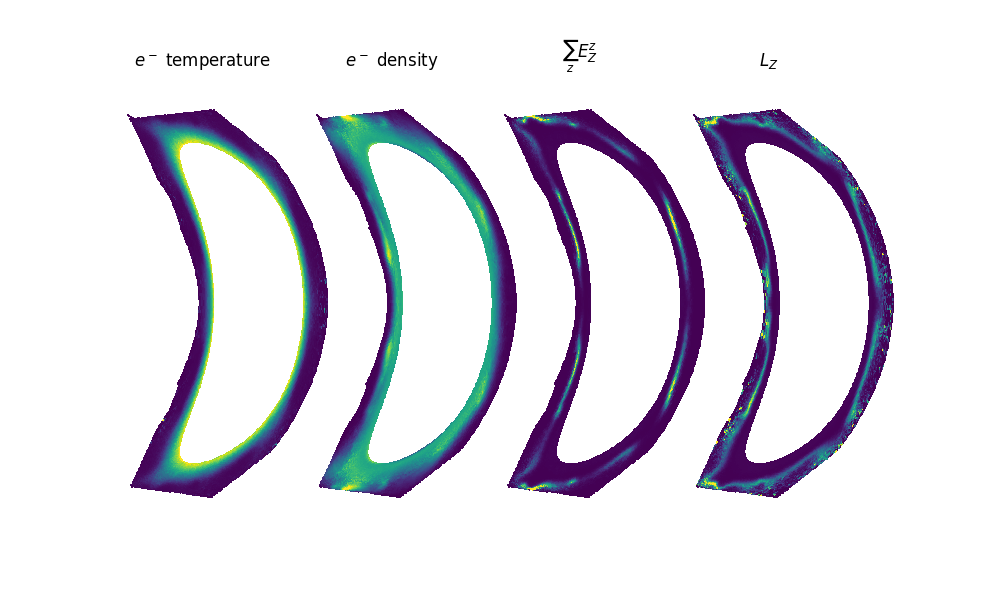

In [78]:
phi = 0
fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(10,6))
fig.subplots_adjust(wspace=-0.1, hspace=0)
R, Z = crossec_pcolorgrid(ds, phi=phi)
pad = "           "

# Te
#axs[0].pcolormesh(R, Z, np.log(0.1+ds["Te"].isel(phi=phitri)))
axs[0].pcolormesh(R, Z, ds["Te"].isel(phi=phi), vmax=150)
axs[0].set_title("$e^-$ temperature"+pad)
# ne
axs[1].pcolormesh(R, Z, ds["ne"].isel(phi=phi), vmax=5e19)
axs[1].set_title("$e^-$ density"+pad)
# some Ez
axs[2].pcolormesh(R, Z, ds["Ez"].isel(phi=phi).sum(dim="Ionization", skipna=False), vmax=0.5e7)
axs[2].set_title("$\sum_z E_Z^z$"+pad)
# overall Lz
axs[3].pcolormesh(R, Z, ds["Lz"].isel(phi=phi), vmin=0, vmax=1e-31)
#axs[3].pcolormesh(R, Z, np.log(ds["Lz"].isel(phi=phi)))
axs[3].set_title("$L_Z$"+pad)

for i in range(4):
    axs[i].set_aspect("equal")
    axs[i].axes.xaxis.set_ticklabels([])
    axs[i].axes.yaxis.set_ticklabels([])
    axs[i].axes.xaxis.set_visible(False)
    axs[i].axes.yaxis.set_visible(False)
    axs[i].set_ylim(axs[i].get_ylim()[0]*0.9, axs[i].get_ylim()[1]*0.9)
    axs[i].set_xlim(axs[i].get_xlim()[0]*1.02, axs[i].get_xlim()[1]*0.974)
    axs[i].axis('off')

#fig.tight_layout()

In [79]:
fig.savefig("/u/phg/temp/Ezplot.png", dpi=200)
fig.savefig("/u/phg/temp/Ezplot.pdf")